Seeding for reproducibility

In [3]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Import Dependencies

In [4]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras import layers, models

In [5]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

['grayscale', '.DS_Store', 'segmented', 'color']
39
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']


In [6]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', '.DS_Store', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']


In [7]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

['grayscale', '.DS_Store', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']


In [8]:
print(len(os.listdir("plantvillage dataset/color/Strawberry___healthy")))
print(os.listdir("plantvillage dataset/color/Strawberry___healthy")[:5])

456
['8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1973.JPG', 'b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4847.JPG', 'abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1757.JPG', 'd1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2163.JPG', '3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1942.JPG']


Dataset Path

In [9]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


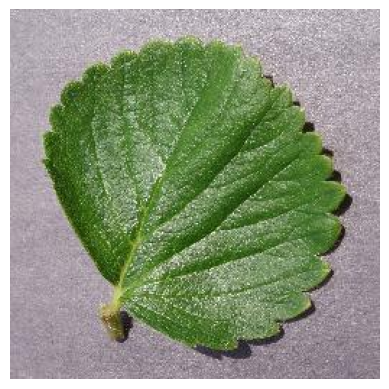

In [10]:
image_path = "plantvillage dataset/color/Strawberry___healthy/8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1973.JPG"

img = mpimg.imread(image_path)
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()



In [11]:
# Image Parameters
img_size = 224
batch_size = 32

Train Test Split

In [12]:
# Image Data Generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [13]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [14]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))



In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     2,986,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         1,254 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,992,358 (11.41 MB)

 Trainable params: 2,992,358 (11.41 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 848s 622ms/step - accuracy: 0.3786 - loss: 2.4757 - val_accuracy: 0.6792 - val_loss: 1.0645
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 850s 626ms/step - accuracy: 0.7424 - loss: 0.8496 - val_accuracy: 0.7880 - val_loss: 0.6943
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 745s 548ms/step - accuracy: 0.8300 - loss: 0.5384 - val_accuracy: 0.8058 - val_loss: 0.6284
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 672s 495ms/step - accuracy: 0.8850 - loss: 0.3562 - val_accuracy: 0.7978 - val_loss: 0.7151
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 770s 567ms/step - accuracy: 0.9233 - loss: 0.2485 - val_accuracy: 0.8060 - val_loss: 0.7207


In [27]:
print("Evaluating model....")
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model....
340/340 ━━━━━━━━━━━━━━━━━━━━ 62s 181ms/step - accuracy: 0.8116 - loss: 0.7082
Validation Loss: 0.7206142544746399
Validation Accuracy: 80.61%


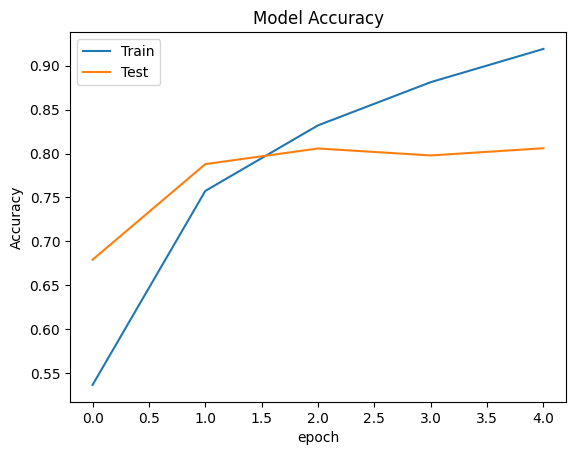

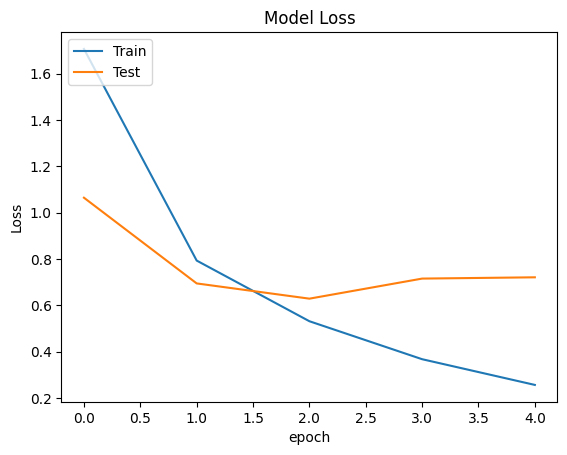

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [31]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [32]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [33]:
import pickle

In [34]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)